<a href="https://colab.research.google.com/github/danielcdo/-MachineLearning/blob/main/bankKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K Nearest Neighbors Learning Model

**KNN**: This statistical learning model can be described as a *lazy learning model*. Not because of its simplicity, but in the way of how it learns and fits the feature training data. The majority vote approach is implemented in the KNN model in which the predict value is selected by the proximity values around the **y** values to be predicted. 

Different of others learning methods such as linear logistic regression and SVM in which a discriminative function is proposed by the model, KNN classifier tries to memorize the training features space. KNN is labelled as a **non-parametric** method, then it doesn't contain a discrinative function. As a non-parametric method it is can be a very good model for a non-linear feature space where the decision boundary cannot be demonstrated as linear function. 

Note that despite its simplicity approach KNN can be a very good classifier method and it can have a significant low error rate similiar to a Bayes' classifer ( the gold method).

**Objective**: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

**Dataset**:Bank Marketing Data Set

**Source**: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#




In [18]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

from matplotlib import pyplot
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

Function to load  the dataset into Pandas daframe stored at my GitHub repository

In [2]:
def load_data(dataset_url, filename):
  ''' Replace github.com by raw.githubusercontent.com. Provide the URL for the raw dataset. Remove /tree/ from original URL.'''
  return pd.read_csv(dataset_url + filename, sep=';')
print('Defined load_data function.')

Defined load_data function.


## Load dataset

Bank marketing dataset stored in GitHub. Please pass the raw URL repository


In [3]:
# Replace github.com by raw.githubusercontent.com
# Remove /tree/ from original URL.
# provide the URL for the raw dataset
# original URL: https://github.com/danielcdo/-MachineLearning/tree/main/datasets/bank/

DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/danielcdo/-MachineLearning/main/datasets/bank/'

In [4]:
# bank-additional-full.csv
# call load_data function
data = load_data(dataset_url=DOWNLOAD_ROOT, filename='bank-additional-full.csv')

# Exploratory Data Analysis - EDA

Take a peak at the data!

In [5]:
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# check statistical parameters available in the dataset
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# check - count nulls
data.isnull().sum()
# not NaN avaiable...it's a such nice dataset! So clean!!!

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
print(data.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


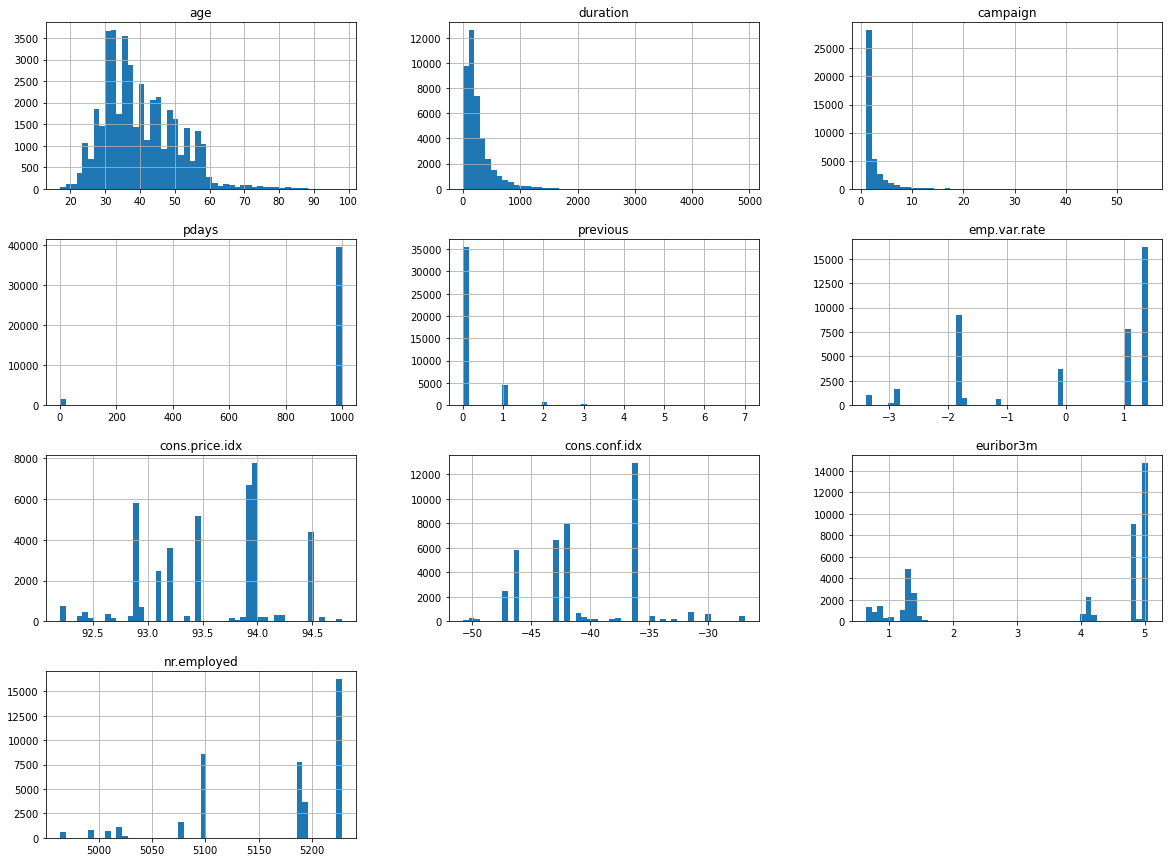

In [ ]:
# call hist method
data.hist(bins=50, figsize=(20,15));

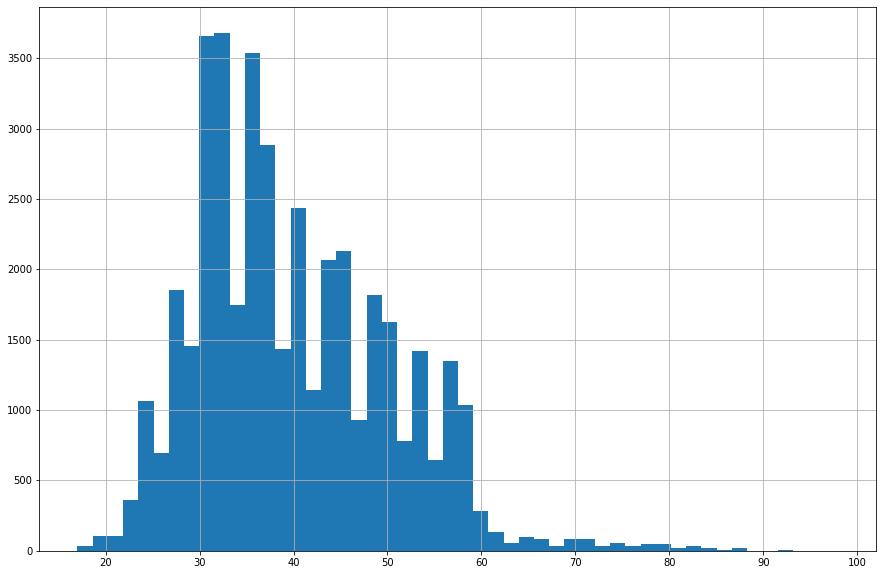

In [ ]:
data['age'].hist(bins=50, figsize=(15,10));

# Let's plot some categorical features 

**NOT a good IDEA** to check all the dataset, a good practice is to put aside the TEST dataset and NOT checking it....avoid any Bias.

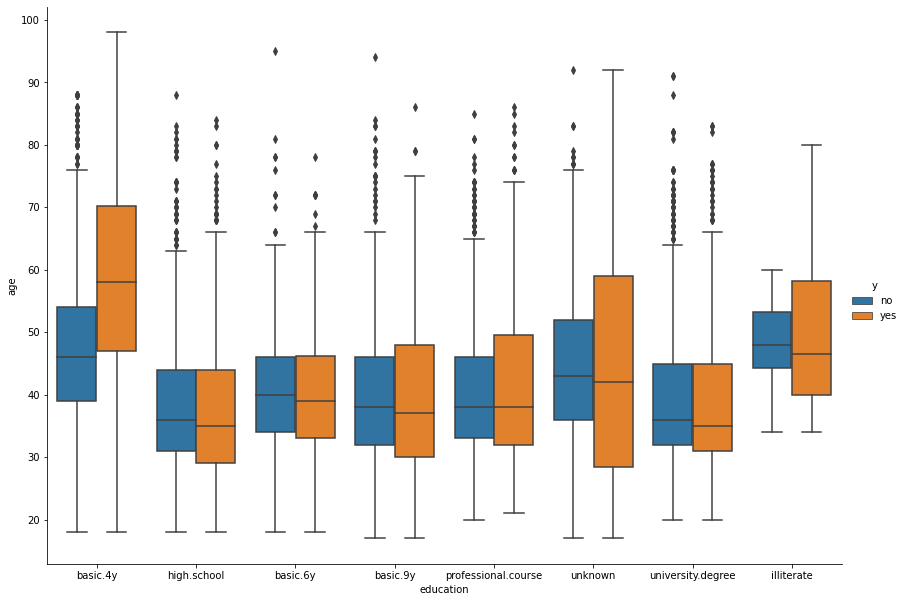

In [ ]:
sns.catplot(x='education', y='age', hue='y', kind='box', data=data, height=8.27, aspect=11.7/8.27);

# Check data correlation


In [6]:
# correlation among every pair of the features using person method.
# Pearson method is the standard correlation coefficient available in Pandas.
data.corr(method='pearson')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


#Preprocessing - Data Cleansing

Build a data pipeline to process all the categorical and numerical data to be load in the KNN model. 
Steps: 

- Numerical data - SimpleImputer for missing data and StandardScaler
- Categorical data - OneHotEncoder

Wrap the steps on the ColumnTransformer

**IMPORTANT**: The bank dataset doesn't contain any missing however I'm keeping my SimpleImputer code - my standarnd pipeline method. StandardScaler is key for KNN classifier. Once sparse matrix will affect metric distante.

In [10]:
# X features - the attribute columns
X = data.drop('y', axis=1)

# labels/targets colum
y = data['y'].copy()

print('Features size: ', len(X))
print('Labels size: ', len(y))

Features size:  41188
Labels size:  41188


# Data preprocessing pipeline
- missing values use SimpleImputer with the median parameter
- StandandScaler
- OneHotEncode 

In [12]:
# get numerical data
num_features = X.select_dtypes(include=[np.number])

In [13]:
num_features

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [14]:
# get categorical data
categorical_features = X.select_dtypes(include=[object])

In [15]:
categorical_features

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


In [21]:
# IMPORT to set the features a list. If not, it may affect the Fit_Transform method under ColumnTransformer
num_features, categorical_features =  list(num_features), list(categorical_features)

# pipeline for numerical attributes
num_pipeline = Pipeline(steps=[
                               ('imputer', SimpleImputer(strategy='median')),
                               ('std_scaler', StandardScaler())])

# full pipeline using ColumnTransformer - dealing with numerical and categorical data in on spot
full_pipeline=ColumnTransformer(transformers=[
                                              ('num', num_pipeline, num_features),
                                              ('categorical', OneHotEncoder(), categorical_features)])

In [22]:
# fit and transformer the entire dataset
X_transformed = full_pipeline.fit_transform(X)

In [25]:
print('Type for the data transformded after applying full pipeline :', type(X_transformed))

Type for the data transformded after applying full pipeline : <class 'numpy.ndarray'>


Preprocessing is a KEY step in any ML model. Let's convert the preprocessing data - scaled features - to a dataframe and check to make sure the scalling worked. 
Attention: it'll not occor in here - got a sparse matric!!!

In [31]:
#df_feat = pd.DataFrame(X_transformed, columns=data.columns[:-1])

# skipping...

# Ok let's apply the ML method

## Splitting  the dataset already transformed in train&test

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

# Fit the train dataset

#Defined KNN instance with n_neigbors=1

In [44]:
clf_knn = KNeighborsClassifier(n_neighbors=1)  # defined oject

clf_knn.fit(X_train, y_train)

# note that the distance metric used is Euclidian - metric='minkowski', and p=2

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [45]:
print('KNN model fitted against training dataset already preprocessing.')

KNN model fitted against training dataset already preprocessing.


# Prediction and Evaluations

Using the predict method against the X_Test.



In [46]:
pred = clf_knn.predict(X_test)

# Model Metrics

Create a classification report and confusion matrix

In [47]:
print('Classification Report')
print(classification_report(y_test, pred))

Classification Report
              precision    recall  f1-score   support

          no       0.93      0.94      0.93     10968
         yes       0.48      0.46      0.47      1389

    accuracy                           0.88     12357
   macro avg       0.71      0.70      0.70     12357
weighted avg       0.88      0.88      0.88     12357



In [48]:
print('Confusion Matrix')
print(confusion_matrix(y_test, pred))

Confusion Matrix
[[10280   688]
 [  745   644]]


# Choosing a K value that better suits the KNN method

# Applying the **Elbow Method**

Let's create a for loop that will train several KNN classifiers with different k values, and let's keep the **error_rate** for each model.

In [49]:
# error_rate as empty list
error_rate = []

for i in range (1,20):                                    # different k values
  clf_knn = KNeighborsClassifier(n_neighbors=i)           # ml object
  clf_knn.fit(X_train, y_train)                           # fit ml
  pred_i = clf_knn.predict(X_test)                        # predict values
  error_rate.append(np.mean(pred_i != y_test))            # stores the average errors where predictions don't match y_test values
